In [7]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
import requests
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import datetime
from sklearn.metrics import silhouette_score
from sklearn.cluster import Birch


In [8]:
excel_file = pd.ExcelFile('../data/EEU11 Final for thesis 2024.xlsx')

In [ ]:
sheet_names = excel_file.sheet_names

# Print the sheet names
print(sheet_names)

['Sheet1']


In [9]:
df = pd.read_excel("../data/EEU11 Final for thesis 2024.xlsx")

In [10]:
df.head()

,Bill Doc No,KWH SoldMeskrem 2012,KWH Sold Tekmt2012,KWH Sold Hidar 2012,KWH Sold Tahasas 2012,KWH Sold Ter2012,KWH SoldYektit 2012,KWH Sold Megbait2012,KWH Sold Meyzia 2012,KWH Sold Genbot 2012,...,KWH Sold Tahsas 2015,KWH Sold Ter 2015,KWH Sold Yekatit 2015,KWH SoldMegabit 2015,KWH SoldMeyazia2015,KWH Sold Genbot 2015,KWH Sold sene 2015,KWH Sold Hamle2015,KWH Sold Nehase2015,Cluster Label
0,41600280341,373,2260,804,1730,960,1626,861,419,1296,...,2376,745,1312,351,1475,1000,2107,1324,1050,0
1,42601642814,361,1286,1429,236,1372,1698,642,254,993,...,581,1306,1526,1505,1038,614,411,681,940,0
2,41200212762,617,1172,1936,1136,2319,894,1972,1747,1982,...,1538,920,608,246,740,2427,1317,175,2368,0
3,42400388164,1143,236,679,269,1943,609,1190,208,1633,...,901,2336,1753,1221,573,2171,1486,1032,797,0
4,42600376796,993,1691,1106,1447,1065,913,1681,2189,1021,...,390,838,1148,1166,1053,1182,615,2275,1845,0


In [11]:
# columns_new = ['Bill Doc No', '28/1/2012', '28/2/2012', '28/3/2012', '28/4/2012',
#        '28/5/2012', '28/6/2012', '28/7/2012', '28/8/2012', '28/9/2012',
#        '28/10/2012', '28/11/2012', '28/12/2012', '28/1/2013', '28/2/2013',
#        '28/3/2013', '28/4/2013', '28/5/2013', '28/6/2013', '28/7/2013',
#        '28/8/2013', '28/9/2013', '28/10/2013', '28/11/2013', '28/12/2013',
#        '28/1/2014', '28/2/2014', '28/3/2014', '28/4/2014', '28/5/2014',
#        '28/6/2014', '28/7/2014', '28/8/2014', '28/9/2014', '28/10/2014',
#        '28/11/2014', '28/12/2014', '28/1/2015', '28/2/2015', '28/3/2015',
#        '28/4/2015', '28/5/2015', '28/6/2015', '28/7/2015', '28/8/2015',
#        '28/9/2015', '28/10/2015', '28/11/2015', '28/12/2015']

columns_new = ['Bill Doc No', '2012-01-28', '2012-02-28', '2012-03-28', '2012-04-28', '2012-05-28', '2012-06-28', '2012-07-28', '2012-08-28', '2012-09-28', '2012-10-28', '2012-11-28', '2012-12-28', '2013-01-28', '2013-02-28', '2013-03-28', '2013-04-28', '2013-05-28', '2013-06-28', '2013-07-28', '2013-08-28', '2013-09-28', '2013-10-28', '2013-11-28', '2013-12-28', '2014-01-28', '2014-02-28', '2014-03-28', '2014-04-28', '2014-05-28', '2014-06-28', '2014-07-28', '2014-08-28', '2014-09-28', '2014-10-28', '2014-11-28', '2014-12-28', '2015-01-28', '2015-02-28', '2015-03-28', '2015-04-28', '2015-05-28', '2015-06-28', '2015-07-28', '2015-08-28', '2015-09-28', '2015-10-28', '2015-11-28', '2015-12-28']

In [12]:
df.drop(columns=["Cluster Label"], inplace=True)

In [13]:
df.columns = columns_new

In [14]:
df.head()

,Bill Doc No,2012-01-28,2012-02-28,2012-03-28,2012-04-28,2012-05-28,2012-06-28,2012-07-28,2012-08-28,2012-09-28,...,2015-03-28,2015-04-28,2015-05-28,2015-06-28,2015-07-28,2015-08-28,2015-09-28,2015-10-28,2015-11-28,2015-12-28
0,41600280341,373,2260,804,1730,960,1626,861,419,1296,...,1557,2376,745,1312,351,1475,1000,2107,1324,1050
1,42601642814,361,1286,1429,236,1372,1698,642,254,993,...,2379,581,1306,1526,1505,1038,614,411,681,940
2,41200212762,617,1172,1936,1136,2319,894,1972,1747,1982,...,2343,1538,920,608,246,740,2427,1317,175,2368
3,42400388164,1143,236,679,269,1943,609,1190,208,1633,...,604,901,2336,1753,1221,573,2171,1486,1032,797
4,42600376796,993,1691,1106,1447,1065,913,1681,2189,1021,...,1727,390,838,1148,1166,1053,1182,615,2275,1845


In [15]:
df = df.melt(id_vars='Bill Doc No', var_name='Date', value_name='Amount')

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])


# Convert the Money column to numeric
df['Amount'] = pd.to_numeric(df['Amount'])

In [16]:
df.head()

,Bill Doc No,Date,Amount
0,41600280341,2012-01-28,373
1,42601642814,2012-01-28,361
2,41200212762,2012-01-28,617
3,42400388164,2012-01-28,1143
4,42600376796,2012-01-28,993


In [17]:
df.to_csv("all_bills.csv", index=False)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428176 entries, 0 to 2428175
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Bill Doc No  object        
 1   Date         datetime64[ns]
 2   Amount       int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 55.6+ MB


In [19]:
df.drop_duplicates(subset=["Bill Doc No", "Date"])

,Bill Doc No,Date,Amount
0,41600280341,2012-01-28,373
1,42601642814,2012-01-28,361
2,41200212762,2012-01-28,617
3,42400388164,2012-01-28,1143
4,42600376796,2012-01-28,993
...,...,...,...
2428171,10404551255,2015-12-28,1827
2428172,10285104882,2015-12-28,1249
2428173,10245464219,2015-12-28,1614
2428174,10202778694,2015-12-28,1046


In [20]:
df["Bill Doc No"].value_counts()

37452758622    96
96005562893    96
68381195346    96
82193130377    96
52974455903    96
               ..
41011334586    48
41011334587    48
41011334638    48
41011334639    48
10087585927    48
Name: Bill Doc No, Length: 50526, dtype: int64

In [21]:
df = df[df["Bill Doc No"] != "Bill Doc No"]

In [22]:
df_agg = df.groupby("Bill Doc No").agg({"Amount": "mean"}).reset_index()

In [23]:
df_agg

,Bill Doc No,Amount
0,10000260282,1370.062500
1,10000260631,1070.937500
2,10000260663,1349.208333
3,10000260693,1290.479167
4,10000261128,1306.020833
...,...,...
50520,99984754015,1340.125000
50521,99985563314,1094.375000
50522,99991476511,1256.666667
50523,99994599202,1245.833333


### Kmeans

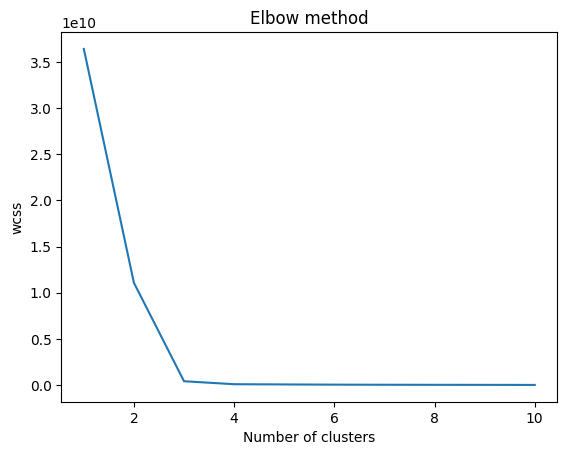

In [24]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(init="k-means++", n_clusters=i)
    kmeans.fit(df_agg[["Amount"]])
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [25]:
kmeans = KMeans(init="k-means++", n_clusters=3)
kmeans.fit(df_agg[["Amount"]])

KMeans(n_clusters=3)

In [26]:
labels = kmeans.predict(df_agg[["Amount"]])
silhouette_score(df_agg[["Amount"]], labels=labels)

0.9259178770294629

In [27]:
kmeans.predict([[1500]])

/home/sam/Documents/projects/practice/fastapi/fastapi/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int32)

In [28]:
import pickle
# Save the model to a file
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Load the model from the file
with open('kmeans_model.pkl', 'rb') as f:
    kmeans = pickle.load(f)

# Predict against a single value
single_value = [2000]
predicted_cluster = kmeans.predict([single_value])
print(predicted_cluster)

[0]


/home/sam/Documents/projects/practice/fastapi/fastapi/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


### BiRCH

In [29]:
# Creating the BIRCH clustering model
brc = Birch(branching_factor=50, 
                    n_clusters=3, 
                    threshold=1)
brc.fit(df_agg[["Amount"]])
labels = brc.labels_
silhouette_score(df_agg[["Amount"]], labels=labels)


0.9259178770294629

In [30]:
import pickle
# Save the model to a file
with open('../birch_model.pkl', 'wb') as f:
    pickle.dump(brc, f)